# Heart Disease Prediction

### Import libraries

we imported  first all the neccesary libraries. The main library that is `pandas`. `Pandas` to create and work with dataframes and datasets. 

For visualization the  library `matplotlib` and subpackage `pyplot`. 

For implementing Machine Learning models and processing of data, the `sklearn` library.

For removing warnings that produce by training model, we used the library `warnings`

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Read data

Read file 'heart.csv' to local variable 'data'

In [4]:
data = pd.read_csv("cardio_train11.csv", sep=";")
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


### 1. Analize attributes of dataset/ Understanding the data

__--__ Firstly, We should to look on _correlation matrix_. It would help to understand dependency between the attributes. 

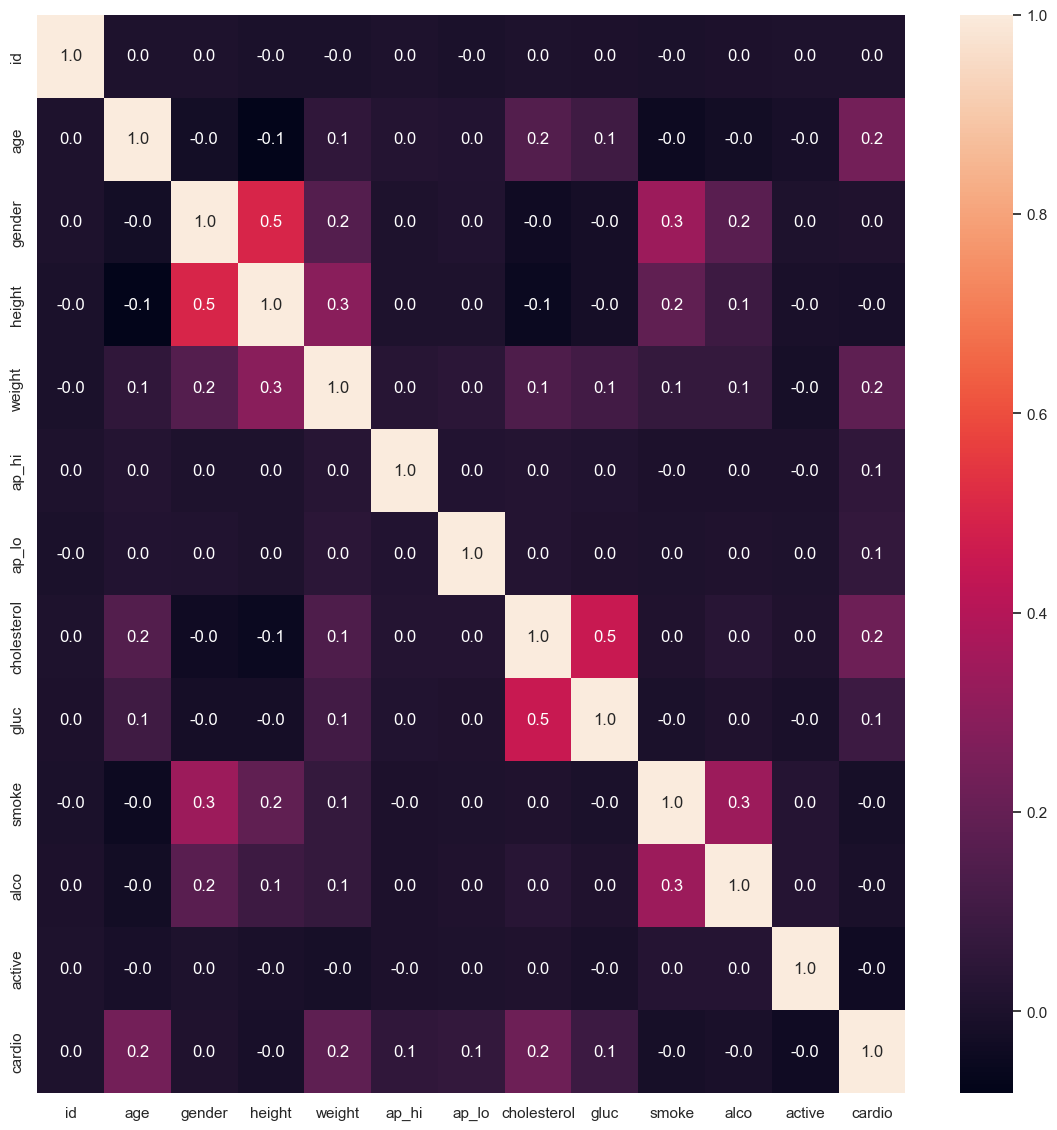

In [8]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

From this correlation matrix, we can understand that all data is unique and not strongly correlated with each other.

It’s also worth noting that some attributes are highly correlated with the target - ch(_chest pain_), thalch, slope

__--__ Secondly, let's look on target balanced plot. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use

In [72]:
data.cardio.value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

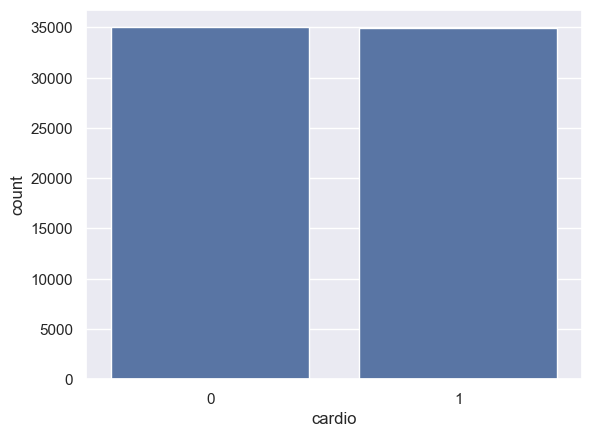

In [10]:
sns.countplot(x="cardio", data=data)
plt.show()

__--__ Find _missing value_

In [40]:
data.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


__--__ The last point of that topic is to look close on data in our dataset. Displayed table describe values that present in data. There are import mean, min and max value of each presented attributes.

In [42]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Also, let's point that minimum age is 29, and maximum - 77.

### 2. Statistics

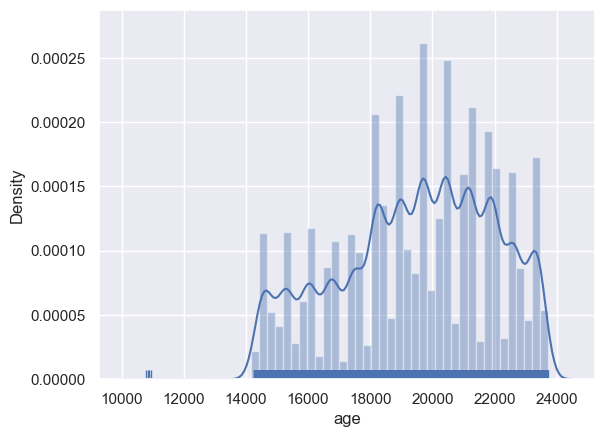

In [43]:
sns.distplot(data['age'],rug=True)
plt.show()

__Sex distribution in data__

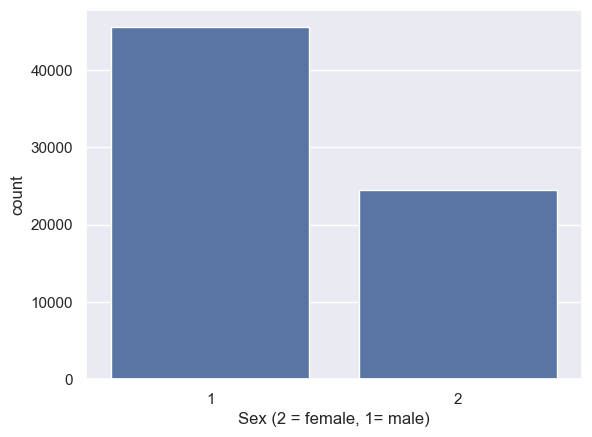

In [44]:
sns.countplot(x='gender', data=data)
plt.xlabel("Sex (2 = female, 1= male)")
plt.show()

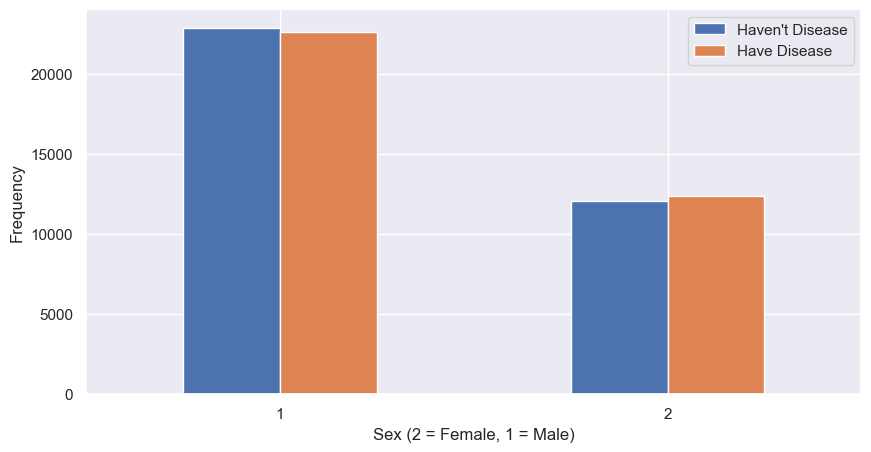

In [45]:
pd.crosstab(data.gender,data.cardio).plot(kind="bar",figsize=(10,5))
plt.xlabel('Sex (2 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### 3. Outliers

In statistics, an outlier is an observation point that is distant from other observations. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.

For detecting outliers in such case I use z-score method. The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. 


In [73]:
z = np.abs(stats.zscore(data))
print(z)

             id       age    gender    height    weight     ap_hi     ap_lo  \
0      1.732080  0.436062  1.364055  0.443452  0.847873  0.122182  0.088238   
1      1.732046  0.307686  0.733108  1.018168  0.749831  0.072610  0.035180   
2      1.732011  0.247997  0.733108  0.078047  0.708942  0.007679  0.141297   
3      1.731976  0.748152  1.364055  0.565254  0.541435  0.137541  0.017879   
4      1.731942  0.808543  0.733108  1.018168  1.264666  0.187113  0.194356   
...         ...       ...       ...       ...       ...       ...       ...   
69995  1.733750  0.092762  1.364055  0.443452  0.124642  0.057251  0.088238   
69996  1.733819  1.269492  0.733108  0.774565  3.597913  0.072610  0.035180   
69997  1.733854  0.163286  1.364055  2.270477  2.139139  0.332333  0.035180   
69998  1.733923  1.200589  0.733108  0.165556  0.153219  0.040145  0.088238   
69999  1.733958  0.434144  0.733108  0.687055  0.153219  0.057251  0.088238   

       cholesterol      gluc     smoke      alco   

In [74]:
threshold = 3
res = np.where(z > 3)
print("Length:", len(res[0]), ":", len(res[1]))
print("Rows:",res[0])
print("Columns:",res[1])

Length: 17252 : 17252
Rows: [    7    14    14 ... 69995 69996 69997]
Columns: [ 8  9 10 ...  9  4 10]


_Number of outliers : 16_

__Save outliers to separate dataset__

In [75]:
outliers_row = []
for j in res[0]:
    r = []
    for i in data.columns:
        r.append(data[i][j])
    outliers_row.append(r)

In [76]:
outliers_data = pd.DataFrame(data=outliers_row, columns = data.columns)
outliers_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
1,23,14532,2,181,95.0,130,90,1,1,1,1,1,0
2,23,14532,2,181,95.0,130,90,1,1,1,1,1,0
3,27,16747,1,158,52.0,110,70,1,3,0,0,1,0
4,29,21755,2,162,56.0,120,70,1,1,1,0,1,0
5,40,21057,2,169,74.0,130,70,1,3,0,0,0,0
6,52,23388,2,162,72.0,130,80,1,1,1,0,1,1
7,68,14507,1,165,77.0,135,90,3,3,0,0,1,1
8,73,15901,2,172,84.0,140,90,1,1,1,0,1,1
9,74,20431,1,164,64.0,180,90,1,1,1,0,1,1


In [77]:
outliers_data.to_csv("outliers_cardio.csv", )

### 4. Data Proccess

##### Categorical data

In [78]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'cholesterol', 'height','weight']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [79]:
data.shape

(70000, 13)

__--__ Fit data to Standart Scaler

In [80]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'cholesterol', 'height','weight']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [81]:
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.436062,2,0.443452,-0.847873,110,80,-0.539322,1,0,0,1,0
1,1,0.307686,1,-1.018168,0.749831,140,90,2.400793,1,0,0,1,1
2,2,-0.247997,1,0.078047,-0.708942,130,70,2.400793,1,0,0,0,1
3,3,-0.748152,2,0.565254,0.541435,150,100,-0.539322,1,0,0,1,1
4,4,-0.808543,1,-1.018168,-1.264666,100,60,-0.539322,1,0,0,0,0
5,8,0.991043,1,-1.627176,-0.500546,120,80,0.930735,2,0,0,0,0
6,9,1.071700,1,-0.896366,1.305554,130,80,2.400793,1,0,0,1,0
7,12,1.262602,2,1.661469,1.444485,130,90,2.400793,3,0,0,1,1
8,13,-0.729913,1,-0.774565,-0.222685,110,70,-0.539322,1,0,0,1,0
9,14,0.147993,1,-0.043755,-0.431081,110,60,-0.539322,1,0,0,0,0


### 5. Train Model

#### Prepare data to train

In [6]:
x = data.drop(['cardio'], axis=1)
y = data['cardio']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic regression

In [15]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [16]:
print("Training accuracy: {}".format(model_lr.score(x_train, y_train)))
predicted_lr = model_lr.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_lr)))

Training accuracy: 0.6718035714285714
Testing accuracy:  0.6808571428571428


In [17]:
probabilities_lr = model_lr.predict_proba(x_test)
probabilities_lr

array([[0.29777766, 0.70222234],
       [0.27461541, 0.72538459],
       [0.26356795, 0.73643205],
       ...,
       [0.39684119, 0.60315881],
       [0.29531748, 0.70468252],
       [0.51315068, 0.48684932]])

#### Decision Tree Classifier

This classifier creates a decision tree based on which, it assigns the class values to each data point.


In [18]:
dt_scores = []
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append([dt_classifier.score(x_test, y_test), i])

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

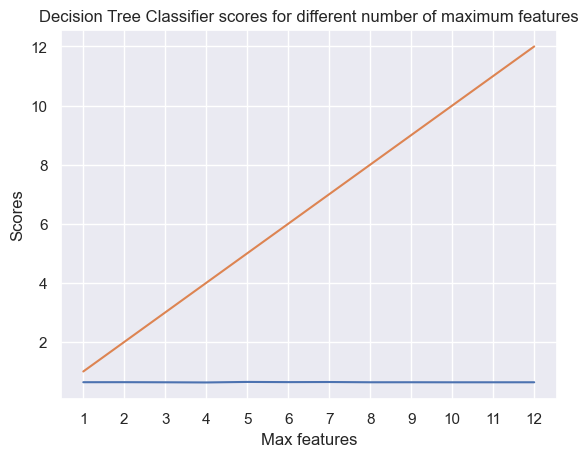

In [19]:
x_ax = [i for i in range(1, len(x.columns) + 1)]
plt.plot(x_ax, dt_scores)

    
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')

plt.title('Decision Tree Classifier scores for different number of maximum features')

In [20]:
dt = DecisionTreeClassifier(max_features = 17, random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_features=17, random_state=42)

In [21]:
print("Training accuracy: {}".format(dt.score(x_train, y_train)))
predicted_dt = dt.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_lr)))

Training accuracy: 1.0
Testing accuracy:  0.6808571428571428


#### K Neighbors Classifier

This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point.

In [22]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append([knn_classifier.score(x_test, y_test), k])

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

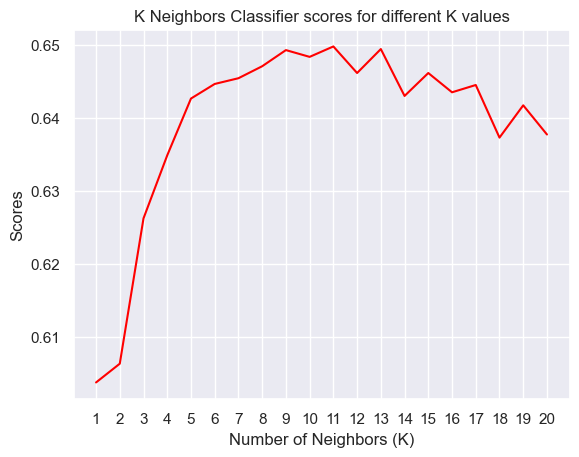

In [23]:
x_axes = [k for k in range(1, 21)]
y_axes = [i[0] for i in knn_scores]
plt.plot(x_axes,y_axes, color = 'red')
    
plt.xticks([i for i in range(1, 21)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

In [24]:
print(knn_scores[0])

[0.6037142857142858, 1]


In [25]:
print("Final score:", knn_scores[-1])

Final score: [0.6377142857142857, 20]


In [26]:
print("The best score:", max(knn_scores))

The best score: [0.6497857142857143, 11]


In [27]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [28]:
print("Training accuracy: {}".format(knn.score(x_train, y_train)))
predicted_knn = knn.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_knn)))

Training accuracy: 0.7251607142857143
Testing accuracy:  0.6470714285714285


## Decision Tree Regressor

In this section, we will implement a Decision Tree Regressor to predict continuous medical indicators, such as cholesterol levels, based on other features.


In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [85]:
# Fit a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(x_train, y_train)

# Predict and evaluate
y_pred_tree = tree_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.36728571428571427
R-squared: -0.4691471746365945


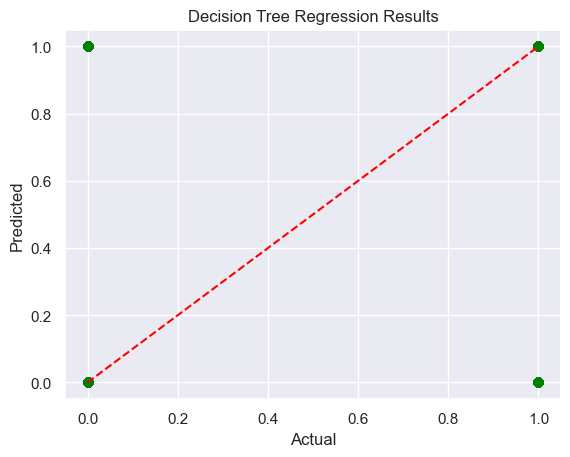

In [86]:
# Visualize predictions
plt.scatter(y_test, y_pred_tree, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regression Results")
plt.show()

In [88]:
# Training accuracy
training_accuracy = tree_regressor.score(x_train, y_train)
print("Training accuracy: {:.2f}".format(training_accuracy))

# Testing accuracy
predicted_dt = tree_regressor.predict(x_test)
testing_accuracy = tree_regressor.score(x_test, y_test)
print("Testing accuracy: {:.2f}".format(testing_accuracy))


Training accuracy: 1.00
Testing accuracy: -0.47


### Linear Regression

In this section, we will implement Linear Regression to predict continuous medical indicators, leveraging the linear relationships among features.


In [30]:
from sklearn.linear_model import LinearRegression

# Fit a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

# Predict and evaluate
y_pred_linear = linear_regressor.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (Linear): {mse_linear}")
print(f"R-squared (Linear): {r2_linear}")

Mean Squared Error (Linear): 0.11627071992880023
R-squared (Linear): 0.5337894947682482


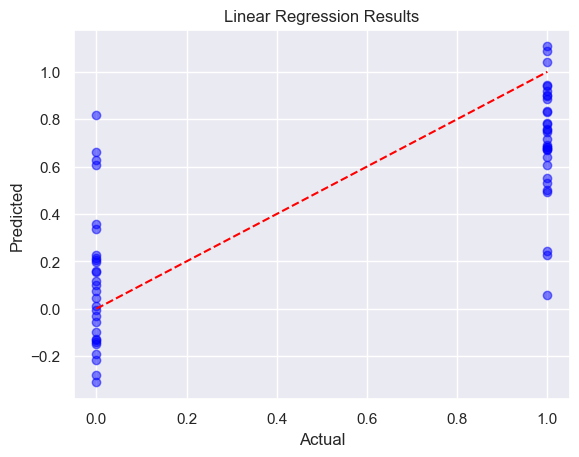

In [31]:
# Visualize predictions
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression Results")
plt.show()

In [32]:
# Calculate training accuracy
y_train_pred = linear_regressor.predict(x_train)
train_mse_linear = mean_squared_error(y_train, y_train_pred)
train_r2_linear = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error (Linear): {train_mse_linear}")
print(f"Training R-squared (Linear): {train_r2_linear}")


Training Mean Squared Error (Linear): 0.12185181336963744
Training R-squared (Linear): 0.5077512865986449


### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
for n_estimators in [10, 50, 100, 200]:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append([rf_classifier.score(x_test, y_test), n_estimators])


Text(0.5, 1.0, 'Random Forest Classifier scores for different n_estimators')

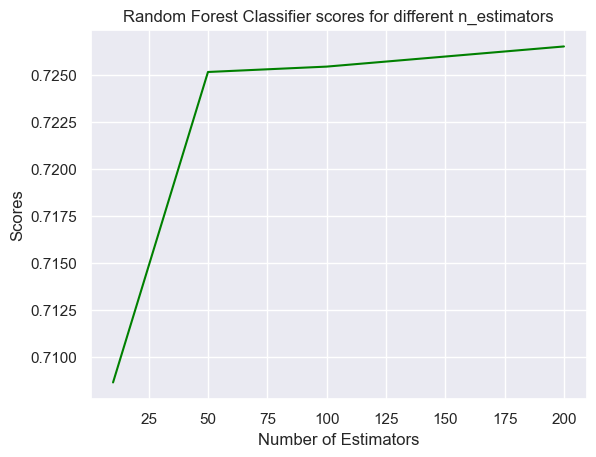

In [11]:
x_axes = [10, 50, 100, 200]
y_axes = [i[0] for i in rf_scores]
plt.plot(x_axes, y_axes, color='green')

plt.xlabel('Number of Estimators')
plt.ylabel('Scores')

plt.title('Random Forest Classifier scores for different n_estimators')

In [12]:
print(rf_scores[0])
print("Final score:", rf_scores[-1])
print("The best score:", max(rf_scores))


[0.7086428571428571, 10]
Final score: [0.7265, 200]
The best score: [0.7265, 200]


In [13]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

print("Training accuracy: {}".format(rf.score(x_train, y_train)))
predicted_rf = rf.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_rf)))

Training accuracy: 1.0
Testing accuracy:  0.7267857142857143


###  Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

print("Training accuracy: {}".format(nb_classifier.score(x_train, y_train)))
predicted_nb = nb_classifier.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_nb)))


Training accuracy: 0.5727857142857142
Testing accuracy:  0.5739285714285715


### 6. Features importance

In [46]:
#model
model_fi = ExtraTreesClassifier()
model_fi.fit(x,y)
print(model_fi.feature_importances_)

[0.05890314 0.03453548 0.04887182 0.04581168 0.05464657 0.02454144
 0.02356867 0.11803855 0.00848443 0.01895251 0.01850768 0.01199224
 0.0079064  0.02355953 0.02553358 0.00100162 0.02063896 0.03859263
 0.00748619 0.01632385 0.07354995 0.08705132 0.02217145 0.01749489
 0.00856113 0.00365337 0.00083169 0.00607819 0.1280017  0.04470932]


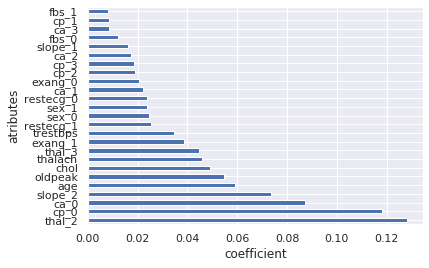

In [47]:
#plot
feat_importances = pd.Series(model_fi.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.xlabel('coefficient')
plt.ylabel('atributes')
plt.savefig('feature_importance.png')
plt.show()